# HR Analysis, Prediction and Visualization

## Understanding the Attrition Problem and the Dataset
HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.

Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

4) Data Visualization:

1. Plot a correlation map for all numeric variables
2. Overtime
3. Marital Status
4. Job Role
5. Gender
6. Education Field
7. Department
8. Buisness Travel
9. Relation between Overtime and Age
10. Total Working Years
11. Education Level
12. Number of Companies Worked
13. Distance from Home

In [184]:
import os
os.getcwd()

'C:\\Users\\Snehal Sanap\\OneDrive\\Desktop\\AIML_STUDY\\INeuron'

In [186]:
pd.set_option('display.max_columns', None)

In [187]:
df = pd.read_csv('C:\\Users\\Snehal Sanap\\OneDrive\\Desktop\\AIML_STUDY\\INeuron\\Community Live Sessions\\HRPrediction\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [188]:
df.shape

(1470, 35)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [190]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [192]:
num_cols =[i for i in df.columns if df[i].dtype!='O']
print(num_cols, len(num_cols))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 26


In [193]:
cat_cols =[i for i in df.columns if df[i].dtype=='O']
print(cat_cols, len(cat_cols))

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'] 9


In [194]:
discrete_cols =[i for i in num_cols if df[i].nunique()<25]
print(discrete_cols, len(discrete_cols))

['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 17


In [195]:
conti_cols = [i for i in num_cols if i not in discrete_cols]
print(conti_cols, len(conti_cols))

['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany'] 9


In [197]:
#target distn
df.Attrition.value_counts() , df.Attrition.value_counts()/len(df)

(No     1233
 Yes     237
 Name: Attrition, dtype: int64,
 No     0.838776
 Yes    0.161224
 Name: Attrition, dtype: float64)

In [198]:
df['Attrition_rate'] = np.where(df.Attrition =='Yes', 1, 0)
df['Attrition_rate'].value_counts()

0    1233
1     237
Name: Attrition_rate, dtype: int64

In [ ]:
# +ve class is 16% and -ve class is 84% quite balnced set

<AxesSubplot:xlabel='Attrition', ylabel='count'>

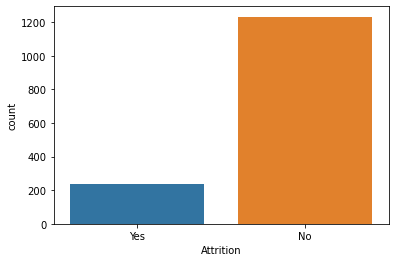

In [201]:
sns.countplot(x='Attrition', data=df)

In [209]:
#cat cols individdual representation
#We'd now eplore the number of people based on different criteria to see which criteria is the dominat one for attrition

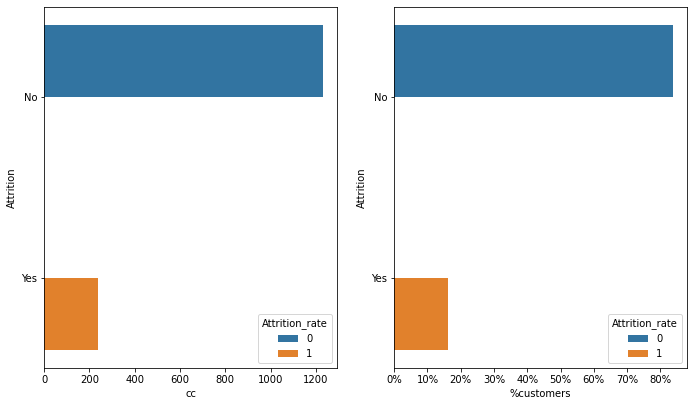

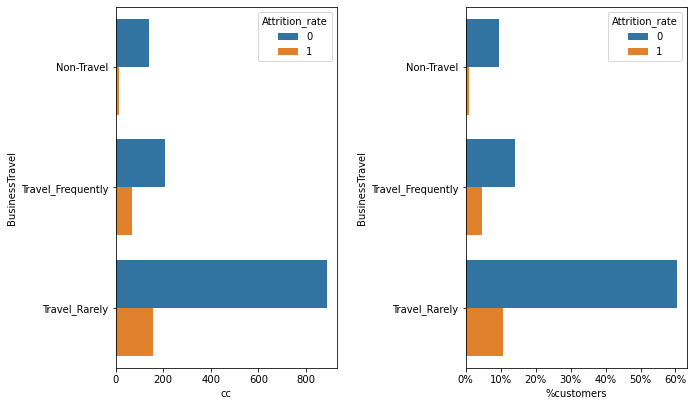

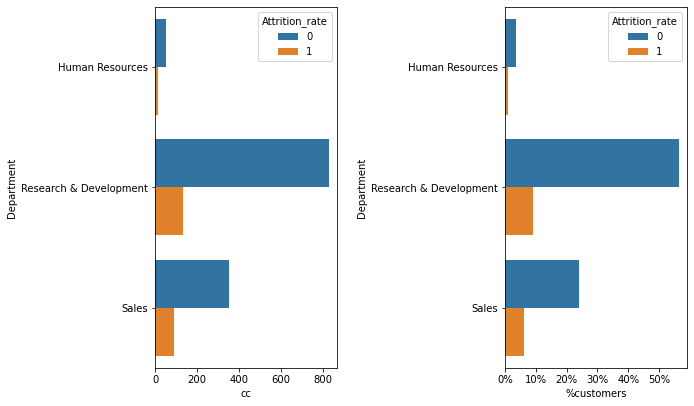

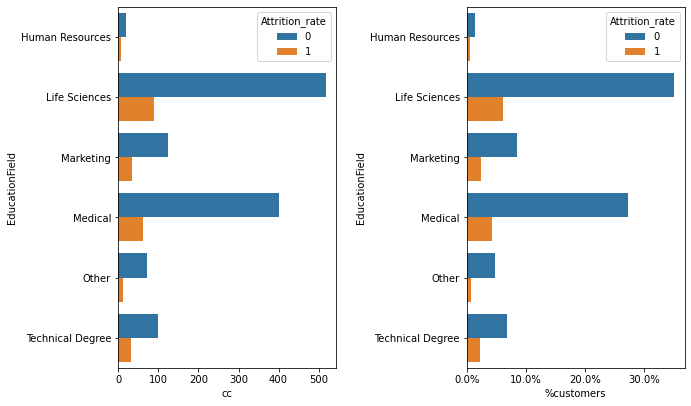

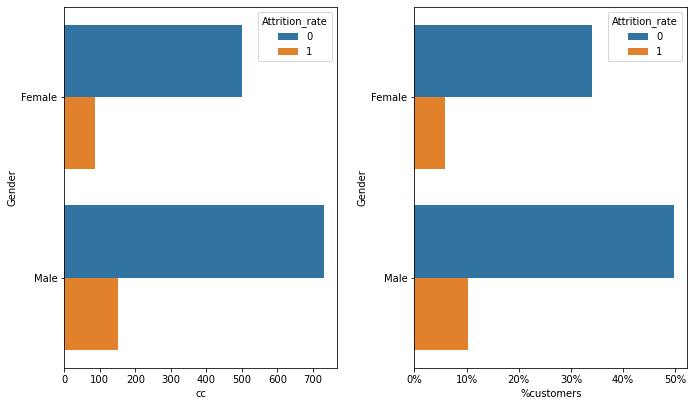

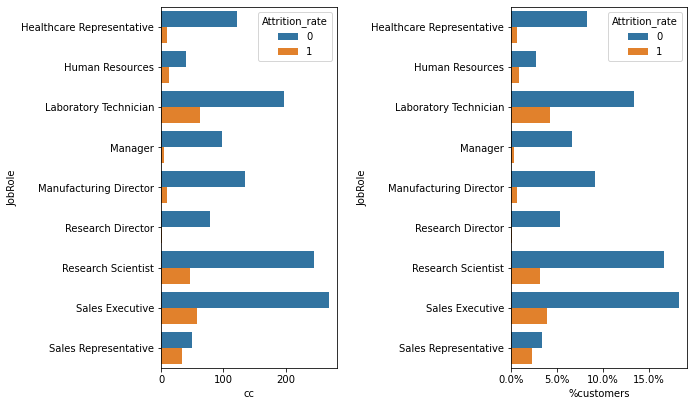

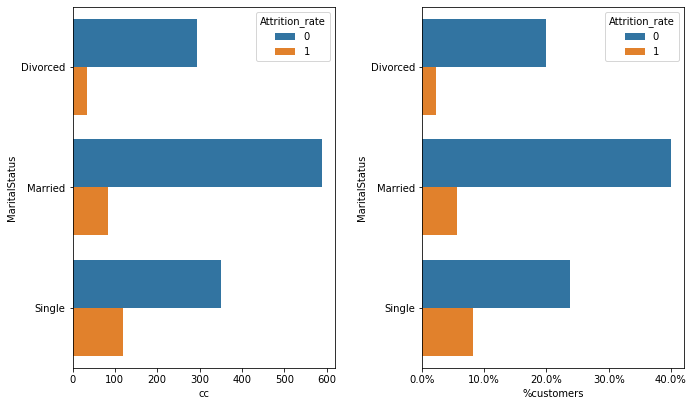

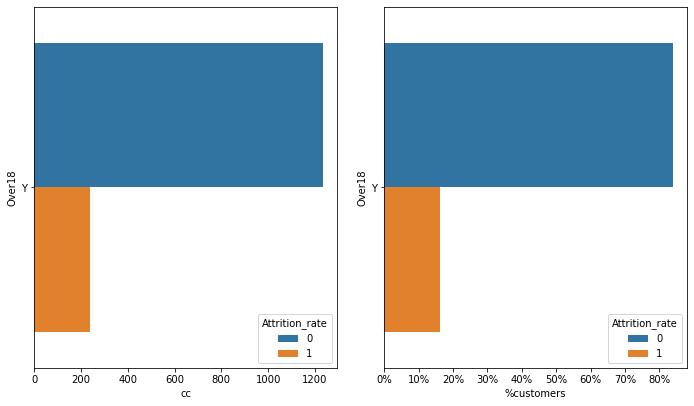

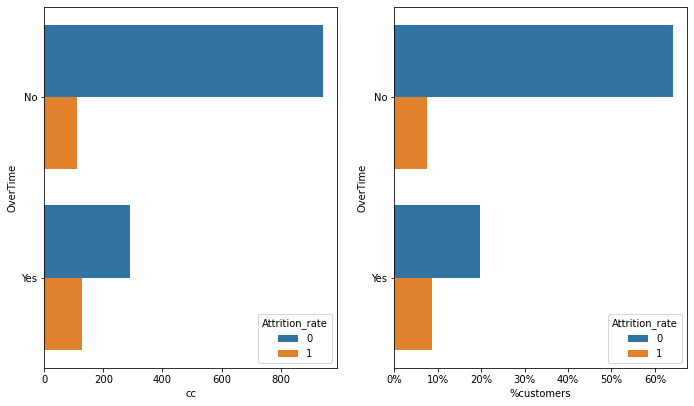

In [208]:
import matplotlib.ticker as mtick
for i in cat_cols:
    a = df.groupby([i,'Attrition_rate']).size().reset_index().rename({0:'cc'},axis=1)
    a['%customers'] = a['cc']*100/len(df)
    
    fig, ((ax1, ax2))= plt.subplots(1,2, figsize=(10,6))
    ax = sns.barplot(x='cc', y=i, data=a, hue='Attrition_rate', ax=ax1)
    ax = sns.barplot(x='%customers', y=i, data=a, hue='Attrition_rate', ax=ax2)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    plt.tight_layout(pad=2)

#obs :
1. Non Attrition cases count for 84% of the data, whereas attrin contribures to 16%
2. Attrition rate is low wrt business travel, its specifically high non attrn for ppl who rarely travel
3. research and dev dept has the highest non attr rate followed by sales
4. ppl belonging from life sciences and medical have the highest non attr rate
5. non attr rate for M > F
6. ppl who dont overtime have high non attrn rate over ppl who do overtime

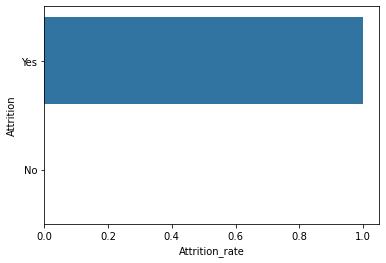

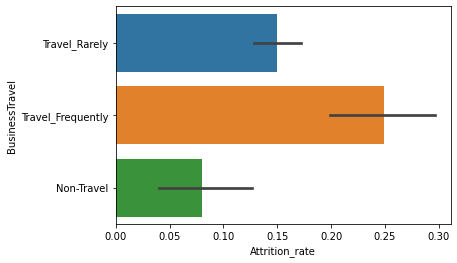

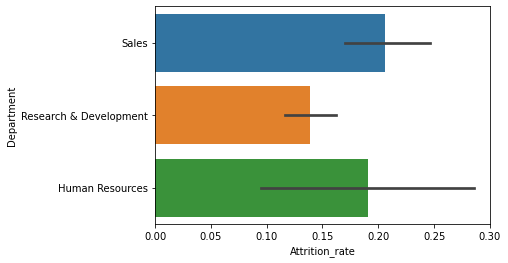

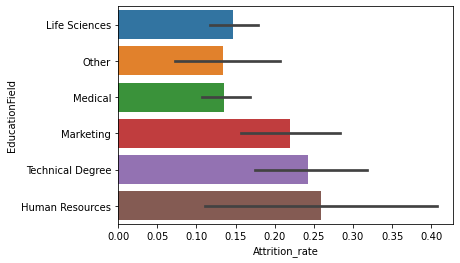

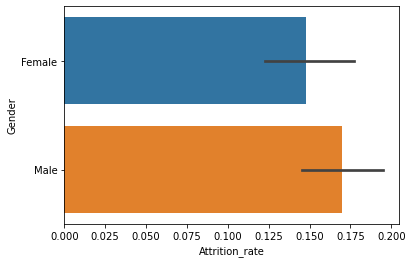

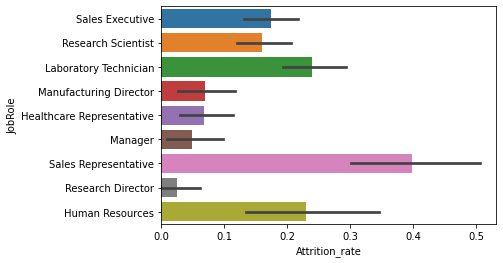

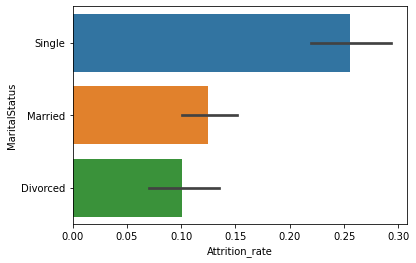

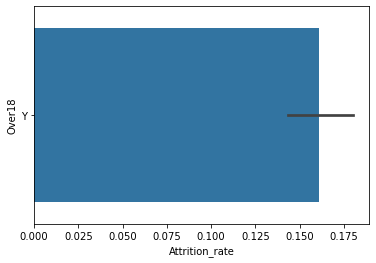

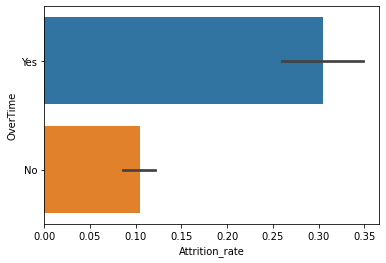

In [212]:
#wrt target col
for i in cat_cols:
    sns.barplot(x ='Attrition_rate', y=i, data=df)
    plt.show()

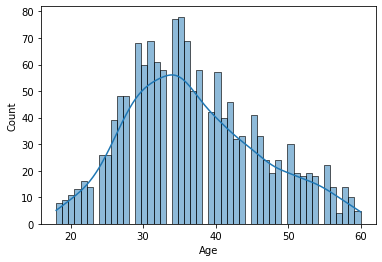

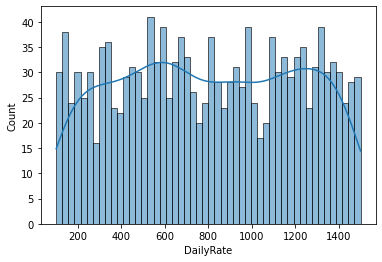

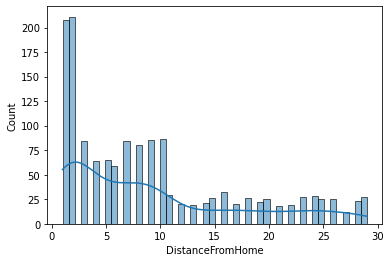

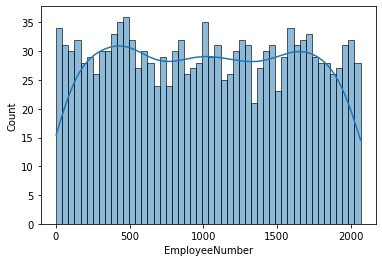

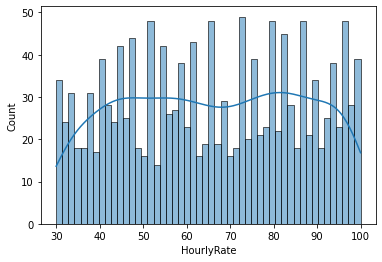

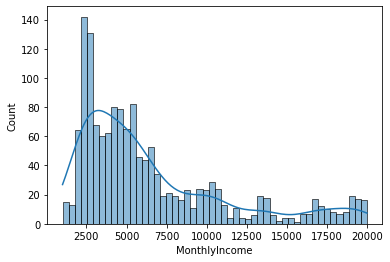

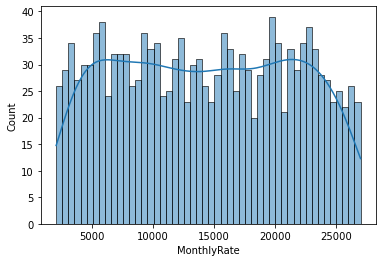

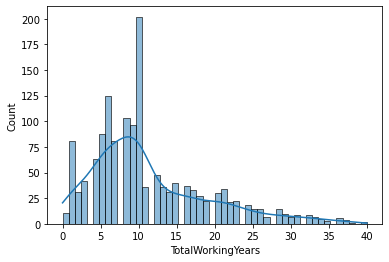

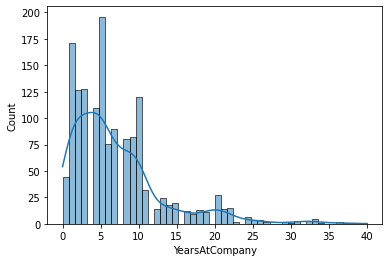

In [214]:
#num cols :
for i in conti_cols:
    sns.histplot(x=i, data=df, bins=50, kde=True)
    plt.show()
#sonme are ND some are right skwed

In [217]:
for i in num_cols:
    print(i , df[i].skew())
#job level , monthly income, distance from home,NumCompaniesWorked,PercentSalaryHike, PerformanceRating, StockOptionLevel , YearsAtCompany,
#YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager --right skewed

Age 0.4132863018563338
DailyRate -0.003518568352325854
DistanceFromHome 0.9581179956568269
Education -0.2896810819684331
EmployeeCount 0
EmployeeNumber 0.016574019580105036
EnvironmentSatisfaction -0.32165444773937907
HourlyRate -0.03231095290044942
JobInvolvement -0.4984193640419493
JobLevel 1.0254012829518246
JobSatisfaction -0.3296719586636647
MonthlyIncome 1.3698166808390662
MonthlyRate 0.018577807891132458
NumCompaniesWorked 1.026471111968205
PercentSalaryHike 0.8211279755780908
PerformanceRating 1.921882702142603
RelationshipSatisfaction -0.30282756517072296
StandardHours 0
StockOptionLevel 0.9689803167738937
TotalWorkingYears 1.1171718528128527
TrainingTimesLastYear 0.5531241710537028
WorkLifeBalance -0.5524802990965146
YearsAtCompany 1.7645294543422085
YearsInCurrentRole 0.9173631562908262
YearsSinceLastPromotion 1.9842899833524859
YearsWithCurrManager 0.8334509919918475


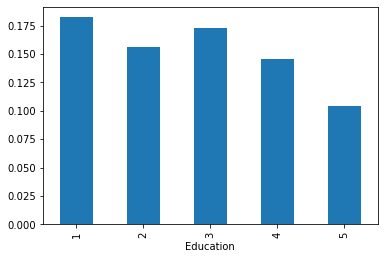

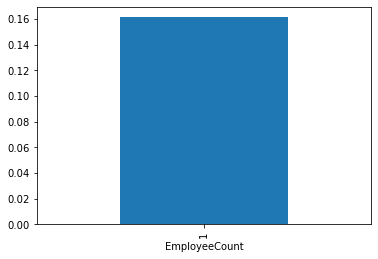

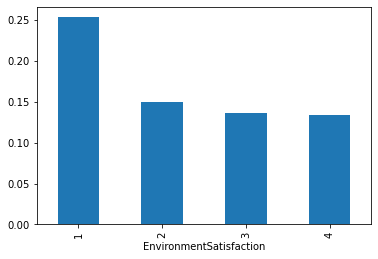

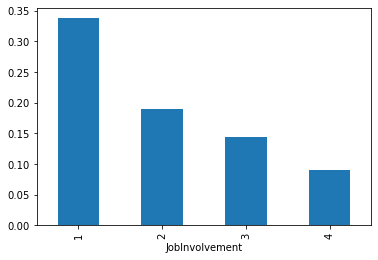

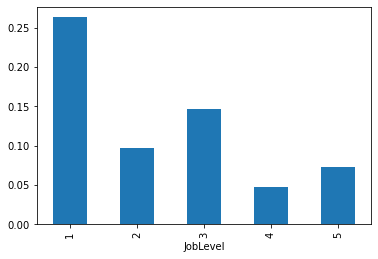

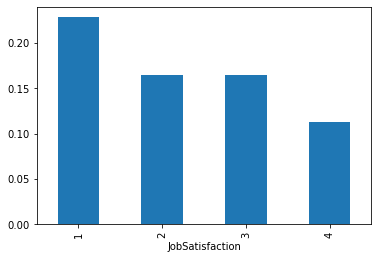

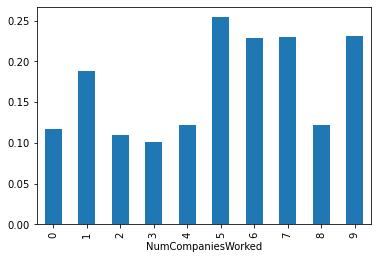

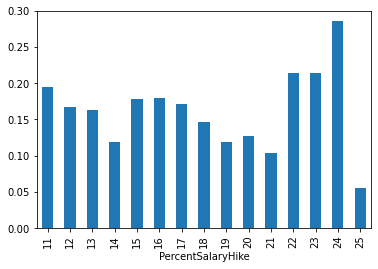

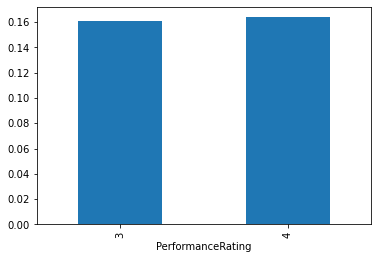

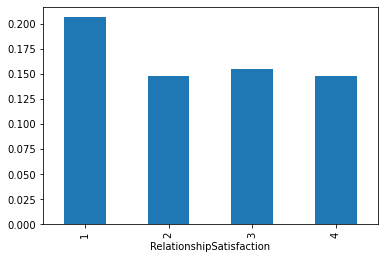

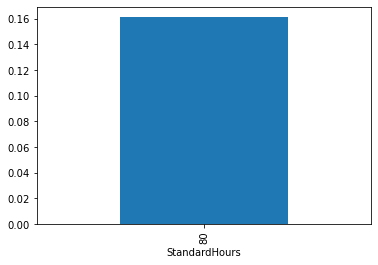

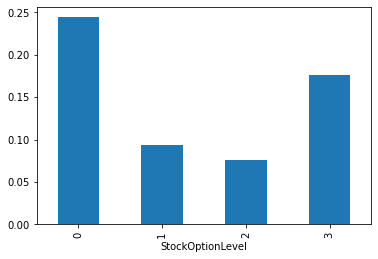

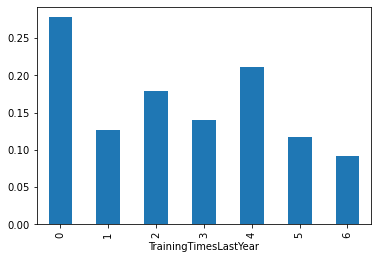

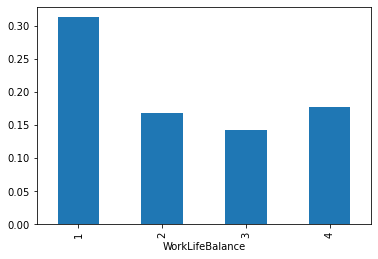

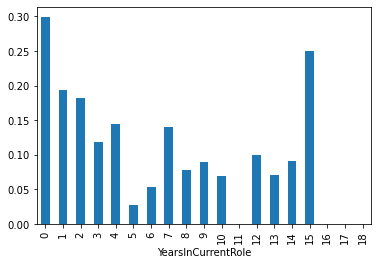

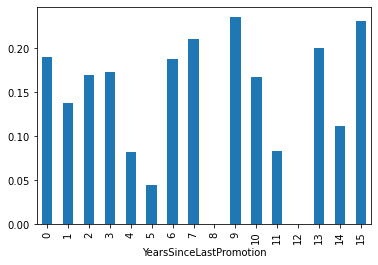

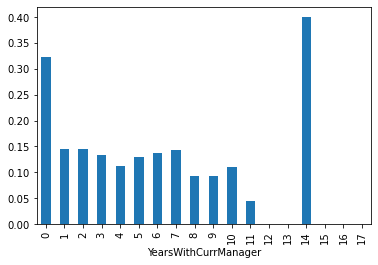

In [215]:
#discrete cols
for i in discrete_cols:
    df.groupby(i)['Attrition_rate'].mean().plot.bar()
    plt.show()
#some var hacve monotic exp decrese relation with target col

<AxesSubplot:>

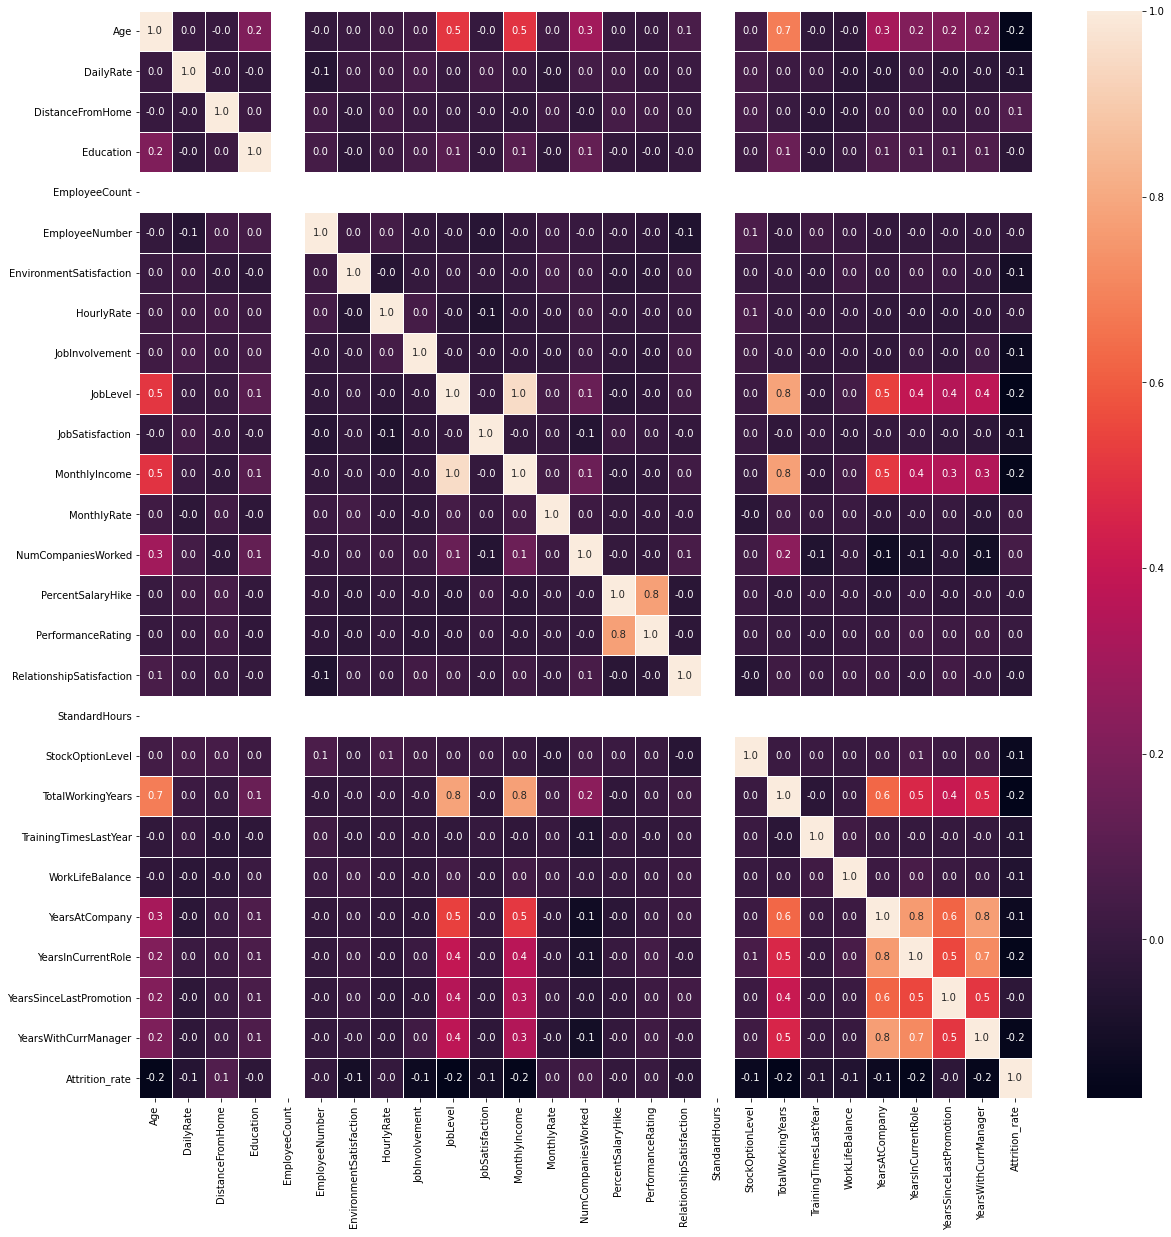

In [219]:
#plot corr
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [224]:
def remove_corr(data, threshold):
    col_remove=set()#unique names of 1st our of two highky corr feat 
    corr = data.corr()
    for i in range(len(corr.columns)): #index columns
        for j in range(i): #for each col in that row
            if abs(corr.iloc[i,j]) > threshold: #that particular record and col mei present value ...here we are not consedring the -ve corr
                #but -ve corr feat are highly important they carry info so better NOT TO USE ABS
                colname = corr.columns[i] #get the name of the 1st out of two highly corr feat and add to the col_remove set list
                col_remove.add(colname)
    return col_remove

corr_feat=remove_corr(df, 0.6)
print(list(corr_feat) , len(corr_feat))

['YearsInCurrentRole', 'MonthlyIncome', 'YearsAtCompany', 'PerformanceRating', 'TotalWorkingYears', 'YearsWithCurrManager', 'YearsSinceLastPromotion'] 7


In [ ]:
#these are highly coorleated independent feat cabnn be reoved from the dataset

In [225]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_rate'],
      dtype='object')

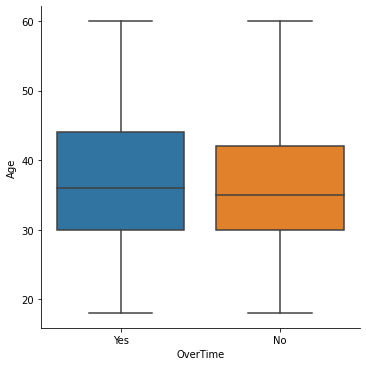

In [227]:
#cross var relations
sns.catplot(x='OverTime', y='Age', data=df, kind='box')
#avg age of ppl who do overtime > to once who dont
#max age of ppl overtime> no overtime

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

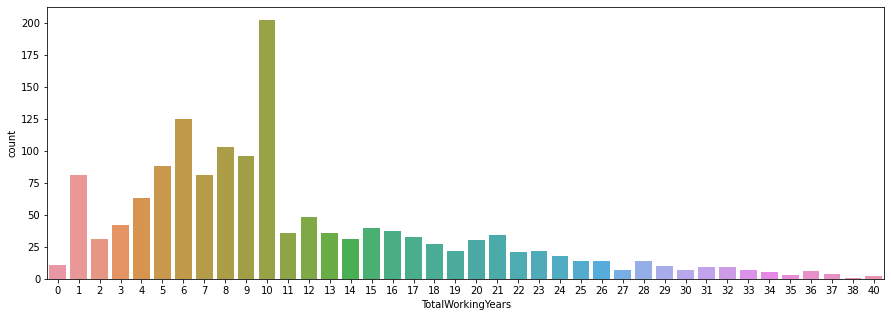

In [229]:
plt.subplots(figsize=(15,5))
sns.countplot(x='TotalWorkingYears', data=df)
#count of ppl who have 10yrs of total working exp is more than the rest

<AxesSubplot:xlabel='Education', ylabel='count'>

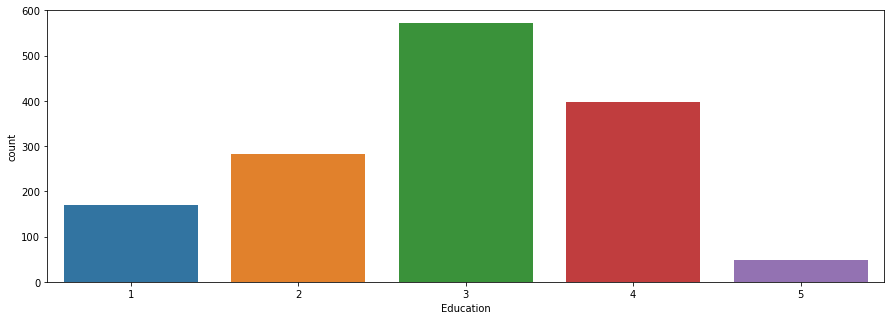

In [230]:
plt.subplots(figsize=(15,5))
sns.countplot(x='Education', data=df)
#count of ppl who have 3 as edu  is more than the rest

In [231]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_rate'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

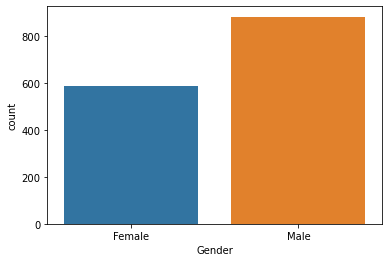

In [232]:
sns.countplot(x='Gender', data=df)
#count of male employees is more than female

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

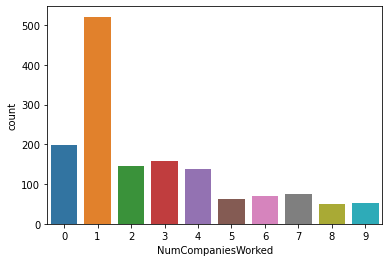

In [233]:
sns.countplot(x='NumCompaniesWorked', data=df)
#count of employees who woked for only 1 compatny more than rest(existing company)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

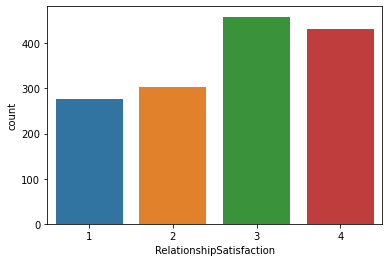

In [234]:
sns.countplot(x='RelationshipSatisfaction', data=df)
#ppl with 3,4 as rating are more--- most ppl satified

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

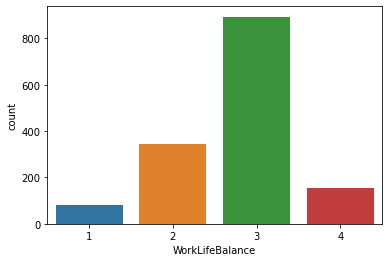

In [236]:
sns.countplot(x='WorkLifeBalance', data=df)
#work life balance is better than avg for most of ppl

C:\Users\Snehal Sanap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

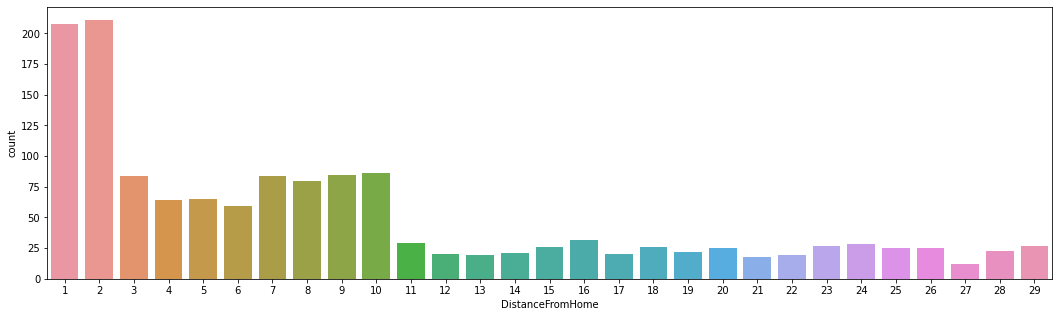

In [237]:
#count of people based on the distance from home they are working
plt.subplots(figsize=(18,5))
sns.countplot(df.DistanceFromHome)

In [240]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_rate'],
      dtype='object')

In [ ]:
#more ppl work close from where they stay , very few ppl coming from far

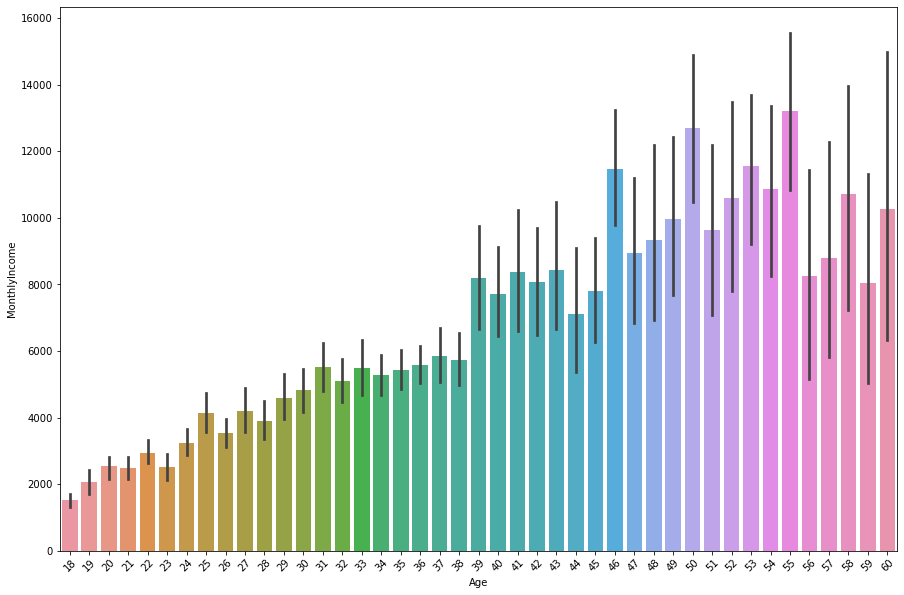

In [243]:
plt.figure(figsize=(15,10))
sns.barplot(x ='Age', y='MonthlyIncome', data=df)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='JobRole'>

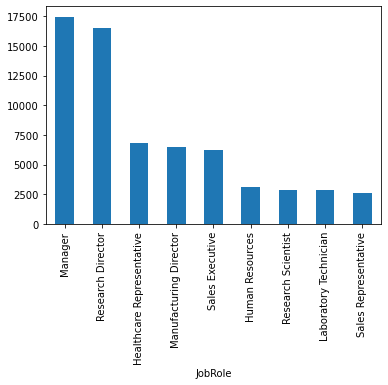

In [248]:
#jobrole v/s monthly income
df.groupby('JobRole')['MonthlyIncome'].median().sort_values(ascending=False).plot.bar()

In [249]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_rate'],
      dtype='object')

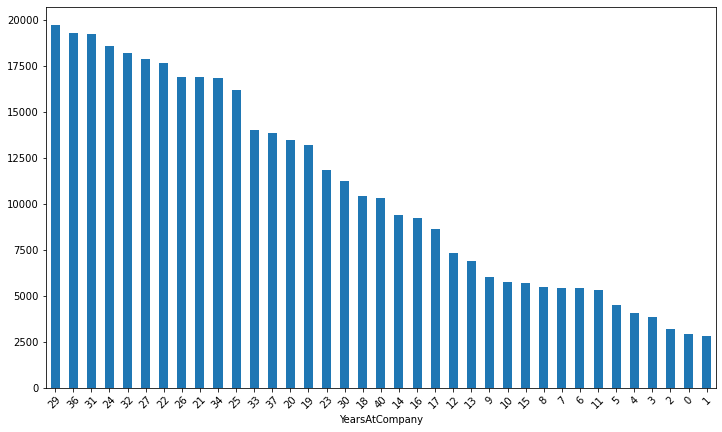

In [255]:
plt.figure(figsize=(12,7))
df.groupby('YearsAtCompany')['MonthlyIncome'].median().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45)
plt.show()

In [259]:
age=pd.DataFrame(df.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age.reset_index(inplace=True)
age.head()

,Age,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate
0,18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000
1,19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667
2,20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091
3,21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077
4,22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000


In [261]:
jobrole=pd.DataFrame(df.groupby("JobRole")[["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"]].mean())
jobrole

,PercentSalaryHike,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,WorkLifeBalance
JobRole,,,,,
Healthcare Representative,15.450382,8.374046,14.068702,4.862595,2.702290
Human Resources,14.807692,5.326923,8.173077,3.134615,2.923077
Laboratory Technician,15.046332,5.019305,7.656371,3.200772,2.718147
Manager,15.137255,14.431373,24.549020,6.450980,2.774510
Manufacturing Director,15.593103,7.600000,12.786207,4.972414,2.765517
Research Director,14.950000,10.937500,21.400000,6.287500,2.862500
Research Scientist,15.448630,5.113014,7.715753,3.273973,2.678082
Sales Executive,14.889571,7.496933,11.101227,4.855828,2.803681
Sales Representative,15.674699,2.915663,4.674699,2.012048,2.891566


Text(0.5, 1.0, 'Education Field Counts')

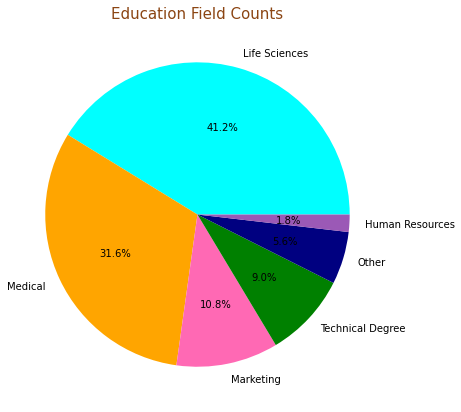

In [263]:
#euctaion field pie chart
labels=df.EducationField.value_counts().index
sizes=df.EducationField.value_counts().values
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

All the exploratory data analysis above shall help the HR team to find a pattern or find and filter the criteria which are most reponsible for attrition.

In [266]:
#encoding
for i in cat_cols:
    print(i , ' -->   ', df[i].nunique(),  ' -->   ', df[i].unique())

Attrition  -->    2  -->    ['Yes' 'No']
BusinessTravel  -->    3  -->    ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  -->    3  -->    ['Sales' 'Research & Development' 'Human Resources']
EducationField  -->    6  -->    ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  -->    2  -->    ['Female' 'Male']
JobRole  -->    9  -->    ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  -->    3  -->    ['Single' 'Married' 'Divorced']
Over18  -->    1  -->    ['Y']
OverTime  -->    2  -->    ['Yes' 'No']


In [267]:
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [268]:
#target guided ordinal encoding for all
def encode(df, var):
    labels = df.groupby(i)['Attrition_rate'].mean().sort_values().index
    ranks = {k:v for v,k in enumerate(labels)}
    df[i] = df[i].map(ranks)
    return df

for i in ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']:
    encode(df,i)

In [269]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_rate
0,41,Yes,1,1102,2,1,2,2,1,1,2,Female,94,3,2,5,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,2,279,0,8,1,2,1,2,3,Male,61,2,2,4,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,1,1373,0,2,2,0,1,4,4,Male,92,2,1,7,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,2,1392,0,3,4,2,1,5,4,Female,56,3,1,4,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,1,591,0,2,1,1,1,7,1,Male,40,3,1,7,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0


In [270]:
df.drop('Attrition', axis=1, inplace=True)

In [271]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_rate
0,41,1,1102,2,1,2,2,1,1,2,0,94,3,2,5,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,2,279,0,8,1,2,1,2,3,1,61,2,2,4,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,1,1373,0,2,2,0,1,4,4,1,92,2,1,7,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,2,1392,0,3,4,2,1,5,4,0,56,3,1,4,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,1,591,0,2,1,1,1,7,1,1,40,3,1,7,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0


In [273]:
#scale
from sklearn.model_selection import train_test_split
X= df.drop('Attrition_rate', axis=1)
y=df['Attrition_rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [275]:
X_train =pd.DataFrame(X_train, columns=X.columns)
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.750168,-0.157211,-0.582447,1.490022,-0.510365,0.065123,0.988220,0.0,-0.941357,1.149578,-1.253994,-1.723854,-1.026428,-0.049983,0.311926,0.252274,-1.502044,-0.073159,-1.232213,-0.684305,0.0,-0.614418,-0.606472,-0.427503,0.295357,0.0,2.589574,-0.149053,-0.625326,0.338045,0.493132,1.323795,-0.369305,-0.588752
1,-0.418634,-0.157211,-1.123550,1.490022,-0.510365,0.065123,0.988220,0.0,-0.893174,1.149578,-1.253994,-1.528124,0.387487,-0.952304,1.707456,0.252274,1.219088,-0.762021,-0.710063,-0.684305,0.0,1.627555,-0.606472,-0.427503,-0.622837,0.0,-0.942912,-1.315901,-0.625326,0.338045,-0.974852,-1.152405,-0.680793,-1.152310
2,0.907505,-0.157211,-0.046263,0.390931,1.846305,1.065299,-0.860650,0.0,0.043884,-0.677319,0.797452,-1.430260,0.387487,-0.952304,0.777103,-0.661776,1.219088,-0.904136,-0.826876,-0.684305,0.0,-0.614418,0.213940,-0.427503,-1.541030,0.0,-0.942912,-0.667652,0.180006,0.338045,-0.159305,-0.327005,-0.680793,-0.025193
3,-0.971192,-0.157211,0.216910,-0.708161,0.729988,-0.935053,0.063785,0.0,0.131941,-1.590768,0.797452,-0.745207,0.387487,-0.952304,1.242279,0.252274,-1.502044,-0.897811,1.161760,-0.684305,0.0,-0.614418,0.213940,-0.427503,1.213550,0.0,0.234584,-0.926952,1.790671,-1.047806,-0.485524,-0.602138,-0.057817,-0.588752
4,-0.750168,-0.157211,0.280858,-0.708161,-1.006505,0.065123,0.063785,0.0,-0.359849,1.149578,0.797452,-1.332395,-2.440343,-0.952304,1.242279,0.252274,-0.141478,-0.554961,1.427539,0.105101,0.0,-0.614418,1.581292,2.339166,0.295357,0.0,1.412079,-0.538003,-0.625326,0.338045,-0.811742,-0.602138,-0.680793,-0.588752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,-0.308122,-0.157211,1.294196,1.490022,0.109812,1.065299,0.063785,0.0,0.053853,0.236130,-1.253994,1.065288,0.387487,-0.952304,1.707456,0.252274,-0.141478,-0.895070,0.590048,-0.684305,0.0,1.627555,1.034351,-0.427503,1.213550,0.0,0.234584,-1.315901,-0.625326,0.338045,-0.974852,-0.877272,-0.680793,-1.152310
1025,-0.197611,-0.157211,-0.685748,0.390931,-0.138259,1.065299,1.912654,0.0,0.234951,0.236130,0.797452,1.701408,0.387487,-0.952304,0.777103,0.252274,1.219088,-0.451643,-0.996761,-0.684305,0.0,-0.614418,0.487410,-0.427503,-0.622837,0.0,-0.942912,-0.667652,-0.625326,-2.433657,-0.322414,-0.051872,-0.369305,-0.025193
1026,0.686482,-0.157211,0.915424,1.490022,-0.882470,0.065123,-0.860650,0.0,1.135457,1.149578,0.797452,0.380236,0.387487,-0.049983,0.311926,1.166324,-0.141478,0.291409,-1.142637,-0.684305,0.0,1.627555,0.487410,-0.427503,-1.541030,0.0,0.234584,-0.149053,0.180006,0.338045,0.493132,1.323795,1.811110,1.101924
1027,0.133924,-0.157211,-1.325234,-0.708161,-0.882470,2.065476,-0.860650,0.0,-0.414677,1.149578,0.797452,1.309950,0.387487,-0.952304,-0.153251,0.252274,-0.141478,-0.718584,0.879414,1.289208,0.0,1.627555,-0.606472,-0.427503,-0.622837,0.0,0.234584,-0.667652,-2.235991,-2.433657,-0.974852,-1.152405,-0.680793,-0.870531


In [276]:
X_test =pd.DataFrame(X_test, columns=X.columns)
X_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.087099,-2.038265,-0.422576,1.490022,0.109812,1.065299,-0.860650,0.0,-0.715399,-0.677319,0.797452,-1.625989,0.387487,0.852338,0.311926,1.166324,1.219088,0.741162,0.155929,-0.684305,0.0,-0.614418,-0.333002,-0.427503,1.213550,0.0,-0.942912,-0.149053,0.180006,-1.047806,0.493132,-0.327005,2.122598,0.820145
1,-0.418634,-0.157211,-0.570149,-0.708161,1.970340,0.065123,0.063785,0.0,0.867964,1.149578,0.797452,-1.038801,-1.026428,-0.049983,-0.618427,-0.661776,1.219088,-0.452275,1.396229,-0.684305,0.0,-0.614418,-0.606472,-0.427503,1.213550,0.0,-0.942912,-0.797302,-0.625326,0.338045,-0.322414,-0.327005,-0.680793,-0.588752
2,-0.197611,1.723842,-0.356168,1.490022,1.102093,1.065299,0.988220,0.0,0.593824,1.149578,-1.253994,0.086642,0.387487,-0.049983,0.311926,0.252274,-0.141478,-0.390284,1.274923,-1.079007,0.0,1.627555,0.760881,-0.427503,0.295357,0.0,0.234584,-0.797302,-2.235991,-1.047806,-0.485524,-0.602138,0.253670,-0.588752
3,0.354947,-0.157211,1.685266,-0.708161,1.350164,1.065299,1.912654,0.0,0.115326,-1.590768,0.797452,-0.206952,0.387487,0.852338,-1.083604,1.166324,-0.141478,0.813274,1.731787,0.499803,0.0,-0.614418,1.307822,2.339166,1.213550,0.0,0.234584,0.369546,2.596004,0.338045,0.656242,1.598929,2.745573,-0.870531
4,-0.860680,1.723842,-0.855458,-0.708161,1.846305,-0.935053,0.063785,0.0,1.404612,1.149578,0.797452,0.380236,-1.026428,-0.952304,-0.153251,1.166324,1.219088,-0.848893,0.076603,-0.684305,0.0,1.627555,2.401704,2.339166,-0.622837,0.0,-0.942912,-1.315901,0.180006,-1.047806,-0.974852,-1.152405,-0.369305,-1.152310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,-0.087099,-2.038265,-1.450671,-0.708161,1.102093,1.065299,0.063785,0.0,0.183446,-1.590768,0.797452,0.624898,0.387487,-0.049983,-0.618427,1.166324,1.219088,0.277071,1.267903,-0.289602,0.0,-0.614418,1.307822,2.339166,-1.541030,0.0,-0.942912,0.888145,-2.235991,0.338045,0.656242,1.323795,-0.680793,1.383703
437,-0.639657,-0.157211,-1.175201,-0.708161,-1.006505,-0.935053,0.063785,0.0,-0.818409,1.149578,0.797452,1.603544,-1.026428,-0.952304,1.242279,-1.575825,-0.141478,-0.895491,0.278780,-0.684305,0.0,-0.614418,-0.879943,-0.427503,0.295357,0.0,0.234584,-0.926952,0.180006,0.338045,-0.485524,-0.602138,0.253670,-0.588752
438,0.354947,-2.038265,0.706362,1.490022,2.342446,0.065123,-1.785084,0.0,-0.677186,0.236130,0.797452,-0.353749,-2.440343,0.852338,0.311926,-1.575825,-1.502044,0.941895,-0.397952,0.105101,0.0,-0.614418,-0.059531,-0.427503,0.295357,0.0,0.234584,1.147445,-0.625326,0.338045,-0.974852,-1.152405,-0.680793,-0.870531
439,1.681086,-0.157211,-1.199796,-0.708161,-0.758435,0.065123,-0.860650,0.0,-0.796810,1.149578,0.797452,-1.283463,-1.026428,0.852338,-0.618427,0.252274,-0.141478,0.317133,0.758389,-0.289602,0.0,1.627555,-0.333002,-0.427503,0.295357,0.0,-0.942912,2.184643,0.985339,0.338045,-0.322414,-0.051872,-0.680793,-0.025193


In [277]:
#Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel # mei lasso is used
feat_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feat_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [278]:
print('total feat : ', X_train.shape[1])
print('selected imp feat : ',len( X_train.columns[feat_sel_model.get_support()]))
print('coefficients shrank to zero : ', np.sum(feat_sel_model.estimator_.coef_ ==0))

total feat :  34
selected imp feat :  23
coefficients shrank to zero :  11


In [279]:
selected_feat =X_train.columns[feat_sel_model.get_support()]
selected_feat

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [280]:
X_train = X_train[selected_feat]